# Quadratic Forms and related Topics

Literature

`An Introduction to the Conjugate Gradient Method Without the Agonizing Pain`, Edition 1 1/4Jonathan Richard Shewchuk, August 4, 1994

**Scope**

In a series of notebooks this is an attempt to better understand how the method of `steepest descent` and `conjugate gradients` works and it could be applied to solving very large systems of equations iteratively.

---

## Definition and Properties

A quadratic form is defined as scalar valued function $f(\mathbf{x}$ like this:

$$
f(\mathbf{x}) = \frac{1}{2} \cdot \mathbf{x}^T \cdot \mathbf{A} \cdot \mathbf{x} - \mathbf{b}^T \cdot \mathbf{x} + c
$$

$\mathbf{A}$ is a square matrix and $\mathbf{x}$ and $\mathbf{b}$ are vectors. $c$ is a scalar value.

The gradient of a quadratic form is defined like this.

$$
f'(\mathbf{x}) = \left[
\begin{array}{c}
\frac{\partial}{\partial x_1} f(\mathbf{x}) \\
\frac{\partial}{\partial x_2} f(\mathbf{x}) \\
\vdots \\
\frac{\partial}{\partial x_N} f(\mathbf{x})
\end{array}
\right]
$$

The gradient of scalar $c$ is zero.

The gradient of $\mathbf{b}^T \cdot \mathbf{x}$ is:

$$
grad(\mathbf{b}^T \cdot \mathbf{x}) = \mathbf{b}
$$

The compution of the gradient of $\frac{1}{2} \cdot \mathbf{x}^T \cdot \mathbf{A} \cdot \mathbf{x}$ requires some preliminary steps:

$$
\mathbf{A} \cdot \mathbf{x} = \left[\begin{array}{c}
\sum_{j=1}^{N} a_{(1, j)} \cdot x_{j} \\
\sum_{j=1}^{N} a_{(2, j)} \cdot x_{j} \\
\vdots \\
\sum_{j=1}^{N} a_{(N, j)} \cdot x_{j} \\
\end{array}
\right]
$$

Then $\mathbf{x}^T \cdot \mathbf{A} \cdot \mathbf{x}$ is scalar and expressed by equation:

$$
\frac{1}{2} \cdot \mathbf{x}^T \cdot \mathbf{A} \cdot \mathbf{x} = \frac{1}{2} \cdot \sum_{i=1}^{N} \sum_{j=1}^{N} a_{(i, j)} \cdot x_{i} \cdot x_{j}
$$

Thus the gradient is computed like this:

$$
grad\left(\frac{1}{2} \cdot \mathbf{x}^T \cdot \mathbf{A} \cdot \mathbf{x} \right) = \frac{1}{2} \cdot \left(
\left[\begin{array}{c}
\sum_{j=1}^{N} a_{(1, j)} \cdot x_{j} \\
\sum_{j=1}^{N} a_{(2, j)} \cdot x_{j} \\
\vdots \\
\sum_{j=1}^{N} a_{(N, j)} \cdot x_{j} \\
\end{array}
\right] +
\left[\begin{array}{c}
\sum_{i=1}^{N} a_{(i, 1)} \cdot x_{i} \\
\sum_{i=1}^{N} a_{(i, 2)} \cdot x_{i} \\
\vdots \\
\sum_{i=1}^{N} a_{(i, N)} \cdot x_{i} \\
\end{array}
\right]
\right) = \frac{1}{2} \cdot \left(\mathbf{A} \cdot \mathbf{x} + \mathbf{A}^T \cdot \mathbf{x} \right)
$$

Now the gradient is expressed by this equation:

$$
f'(\mathbf{x}) = \frac{1}{2} \cdot \left(\mathbf{A}  + \mathbf{A}^T \right) \cdot \mathbf{x} - \mathbf{b}
$$

For a symmetric matrix $\mathbf{A} = \mathbf{A}^T$ an even simpler equation results:

$$
f'(\mathbf{x}) = \mathbf{A} \cdot \mathbf{x} - \mathbf{b}
$$

If every component of the gradient is `0` for a vector $\mathbf{x_*}$ we have:

$$
\mathbf{A} \cdot \mathbf{x_*} = \mathbf{b}
$$

Vector $\mathbf{x_*}$ is often referred to as the solution vector.

---

## Special Case: matrix `A` / symmetric & positive definite

Matrix $\mathbf{A}$ is positive definite if 

$$\begin{gather}
\mathbf{x}^T \cdot \mathbf{A} \cdot \mathbf{x} > 0 \\
\
\mathbf{x} \neq \mathbf{0}
\end{gather}
$$

But first let us assume only that $\mathbf{A}$ is symmetric. Let us evaluate $f(\mathbf{x_*} + \mathbf{e})$:

$$
f(\mathbf{x_*}+\mathbf{e}) = \frac{1}{2} \cdot (\mathbf{x_*}+\mathbf{e})^T \cdot \mathbf{A} \cdot (\mathbf{x_*}+\mathbf{e}) - \mathbf{b}^T \cdot (\mathbf{x_*}+\mathbf{e}) + c
$$

$$\begin{gather}
f(\mathbf{x_*}+\mathbf{e}) = \frac{1}{2} \cdot (\mathbf{x_*}+\mathbf{e})^T \cdot \mathbf{A} \cdot (\mathbf{x_*}+\mathbf{e}) - \mathbf{b}^T \cdot \mathbf{x_*} - \mathbf{b}^T \cdot \mathbf{e} + c \\
f(\mathbf{x_*}+\mathbf{e}) = \frac{1}{2} \cdot (\mathbf{x_*}+\mathbf{e})^T \cdot \mathbf{A} \cdot \mathbf{x_*} + \frac{1}{2} \cdot (\mathbf{x_*}+\mathbf{e})^T \cdot \mathbf{A} \cdot \mathbf{e} - \mathbf{b}^T \cdot \mathbf{x_*} - \mathbf{b}^T \cdot \mathbf{e} + c \\
f(\mathbf{x_*}+\mathbf{e}) = \frac{1}{2} \cdot \mathbf{x_*}^T \cdot \mathbf{A} \cdot \mathbf{x_*} + \frac{1}{2} \cdot \mathbf{e}^T \cdot \mathbf{A} \cdot \mathbf{x_*} + \frac{1}{2} \cdot \mathbf{x_*}^T \cdot \mathbf{A} \cdot \mathbf{e} + \frac{1}{2} \cdot \mathbf{e}^T \cdot \mathbf{A} \cdot \mathbf{e}  - \mathbf{b}^T \cdot \mathbf{x_*} - \mathbf{b}^T \cdot \mathbf{e} + c \\
f(\mathbf{x_*}+\mathbf{e}) = f(\mathbf{x_*}) + \frac{1}{2} \cdot \mathbf{e}^T \cdot \mathbf{A} \cdot \mathbf{e}
\end{gather}
$$

Assuming now that matrix $\mathbf{A}$ is **positive definite** we have:

$$\begin{gather}
\mathbf{e}^T \cdot \mathbf{A} \cdot \mathbf{e} \gt 0 \\
\
\mathbf{e} \neq 0
\end{gather}
$$

Thus for any vector $\mathbf{e} \neq 0$ the function $f(\mathbf{x_*}+\mathbf{e}) \gt f(\mathbf{x_*})$. Thus for $f(\mathbf{x_*})$ a global minimum is attained.

## Example

The article  `An Introduction to the Conjugate Gradient Method Without the Agonizing Pain` uses a simple example to demonstrate various points.

The example uses a $2 \times 2$ matrix $\mathbf{A}$, a vector $\mathbf{b}$ and a scalar $c$ to define the function $f(\mathbf{x})$:

$$
\mathbf{A} = \left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array}
\right]
$$

$$
\mathbf{b} = \left[
\begin{array}{c}
2 \\
-8
\end{array}
\right]
$$

$$
c = 0
$$

Vector $\mathbf{x_*}$ minimizes the function $f(\mathbf{x})$ :

$$
\mathbf{x_*} = \left[
\begin{array}{c}
2 \\
-2
\end{array}
\right]
$$

A figure show function $f(\mathbf{x}$ as a set of contour lines.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2 x 2 matrix
A_mat = np.array([[3.0, 2.0], [2.0, 6.0]])
# row column vector)
b_vec = np.array([2.0, -8])
b3_vec = np.vstack(([2, 2, 2], [-8, -8, -8]))
c_scalar = 0 

Nx = 100
Ny = 100
x_min = -4.0
x_max = 6.0
y_min = -6
y_max = 4
x_vec = np.linspace(x_min, x_max, Nx)
y_vec = np.linspace(y_min, y_max, Ny)
# making a grid (required for contour plots)
x_grid, y_grid = np.meshgrid(x_vec, y_vec, indexing='xy')

# initialise memory for function values
f_vec = np.zeros(x_grid.shape)

# loop over rows and compute the value of the quadratic form 
# note: this may not be the most elegant approach to calculate the quadratic form efficiently ... 
for i_row in range(Ny):
    xv = np.array([x_grid[i_row, :], y_grid[i_row, :]])
    bx = np.dot(b_vec, xv)
    ax = np.dot(A_mat, xv)
    tmp = xv * ax
    f_vec[i_row, :] = 0.5 * tmp.sum(axis=0) - bx + c_scalar

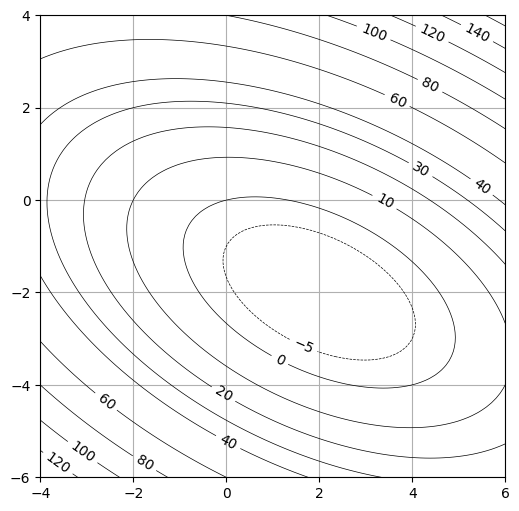

In [3]:
fig1 = plt.figure(1, figsize=[6, 6])
ax_f1 = fig1.add_subplot(1, 1, 1)

CS = ax_f1.contour(x_grid, y_grid, f_vec, linewidths=0.5, colors='black', levels=[-5, 0, 10, 20, 30, 40, 60, 80, 100, 120, 140, 160])
ax_f1.clabel(CS, CS.levels, inline=True, fontsize=10)
ax_f1.grid(True)

---

# The Method of Steepest Descent

Adapted from chapter 4 of:

`An Introduction to the Conjugate Gradient Method Without the Agonizing Pain`, Edition 1 1/4Jonathan Richard Shewchuk, August 4, 1994


Starting from a starting point (vector) $\mathbf{x}_{(0)}$ the approximate solution is found iteratively going through a series of intermediate points $\mathbf{x}_{(i)}$. 

In each point $\mathbf{x}_{(i)}$ the direction of *steepest descent* must be found to establish a new search direction.

For a symmetric matrix $\mathbf{A}$ the gradient $f'(\mathbf{x}_{(i)})$ has been found as:

$$\begin{gather}
f'(\mathbf{x}_{(i)}) = \mathbf{A} \cdot \mathbf{x}_{(i)} - \mathbf{b} = \mathbf{A} \cdot \mathbf{x}_{(i)} - \mathbf{A} \cdot \mathbf{x}_* \\
f'(\mathbf{x}_{(i)}) = \mathbf{A} \cdot \left( \mathbf{x}_{(i)} - \mathbf{x}_*  \right)
\end{gather}
$$

The direction of steepest descent is then the opposite direction:

$$
-f'(\mathbf{x}_{(i)}) = \mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(i)}
$$

Useful definitions:

If the quadratic form $\mathbf{x}$ is minimized for the solutions vector $\mathbf{x}_*$ then the error $e_{(i)}$ at the i'th iteration is:

$$
\mathbf{e}_{(i)} = \mathbf{x}_{(i)} - \mathbf{x}_*
$$

With $\mathbf{A} \cdot \mathbf{x}_0 = \mathbf{b}$ and $\mathbf{A} \cdot \mathbf{x}_{(i)} = \mathbf{b}_{(i)}$ the vector $\mathbf{b}_{(i)}$ should be *interpreted as an approxiation to the target vector $\mathbf{b}$. The difference of these vectors is the residual $\mathbf{r}_{(i)}$. It is expressed by this equation:

$$
\mathbf{r}_{(i)} = \mathbf{b} - \mathbf{b}_{(i)} = \mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(i)} = - \mathbf{A} \cdot \mathbf{e}_{(i)} = -f'(\mathbf{x}_{(i)})
$$

The residual $\mathbf{r}_{(i)}$ is thus just the vector in the direction of *steepest descent*.

----

With these definitions in place a quantitative description of the method of steepest descent is provided.

Starting from initial vector $\mathbf{x}_{(0)}$ we proceed to a new vector $\mathbf{x}_{(1)}$ in the direction of steepest descent (which is $\mathbf{r}_{(0)}$.

$$
\mathbf{x}_{(1)} = \mathbf{x}_{(0)} + s \cdot \mathbf{r}_{(0)}
$$

The parameter $s$ is a *step size* choosen such as to maximise the descent when moving from $\mathbf{x}_{(0)}$  to $\mathbf{x}_{(1)}$ 

We need to calculate the derivative

$$
\frac{\partial}{\partial s} f(\mathbf{x}_{(1)}(s))
$$

which by application of the chain rule is:

$$
\frac{\partial}{\partial s} f(\mathbf{x}_{(1)}) = f'(\mathbf{x}_{(1)})^T \cdot \mathbf{r}_{(0)}
$$

The derivative is zero if gradient vector $f'(\mathbf{x}_{(1)})$ and residual vector $\mathbf{r}_{(0)}$ are orthogonal.

$$
f'(\mathbf{x}_{(1)})^T \cdot \mathbf{r}_{(0)} = 0
$$

From the definition of the residual vector we know $f'(\mathbf{x}_{(1)}) = - \mathbf{r}_{(1)}$ which provides us with this equation:


$$
\mathbf{r}_{(1)}^T \cdot \mathbf{r}_{(0)} = 0
$$

Using $\mathbf{r}_{(1)} = \mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(1)}$ the step size $s$ is computed following these steps:

$$\begin{gather}
\left(\mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(1)}\right)^T \cdot \mathbf{r}_{(0)} = 0 \\
\left(\mathbf{b} - \mathbf{A} \cdot (\mathbf{x}_{(0)} + s \cdot \mathbf{r}_{(0)}) \right)^T \cdot \mathbf{r}_{(0)} = 0 \\
\left(\mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(0)} - s \cdot \mathbf{A} \cdot \mathbf{r}_{(0)} \right)^T \cdot \mathbf{r}_{(0)} = 0 \\
\left(\mathbf{r}_{(0)}) - s \cdot \mathbf{A} \cdot \mathbf{r}_{(0)} \right)^T \cdot \mathbf{r}_{(0)} = 0 \\
\mathbf{r}_{(0)}^T \cdot \mathbf{r}_{(0)} = s \cdot \mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(0)} \\
s = \frac{\mathbf{r}_{(0)}^T \cdot \mathbf{r}_{(0)}}{\mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(0)} }
\end{gather}
$$

---

## An alternative approach to compute the stepsize for `steepest descent`

The approach avoids using the chain rule by directly evaluating the quadratic form.

$$
f(\mathbf{x}_{(1)}) = \frac{1}{2} \cdot (\mathbf{x}_{(0)} + s \cdot \mathbf{r}_{(0)})^T \cdot \mathbf{A} \cdot (\mathbf{x}_{(0)} + s \cdot \mathbf{r}_{(0)}) - \mathbf{b}^T \cdot (\mathbf{x}_{(0)} + s \cdot \mathbf{r}_{(0)}) + c
$$

$$
f(\mathbf{x}_{(1)}) = \frac{1}{2} \cdot (\mathbf{x}_{(0)} + s \cdot \mathbf{r}_{(0)})^T \cdot (\mathbf{A} \cdot \mathbf{x}_{(0)} + s \mathbf{A} \cdot \mathbf{r}_{(0)}) - (\mathbf{b}^T \cdot \mathbf{x}_{(0)} + s \cdot \mathbf{b}^T \cdot \mathbf{r}_{(0)}) + c
$$

$$
f(\mathbf{x}_{(1)}) = \frac{1}{2} \cdot \mathbf{x}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(0)} + s \cdot \mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(0)} + \frac{1}{2} \cdot s^2 \cdot \mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(0)} - \mathbf{b}^T \cdot \mathbf{x}_{(0)} - s \cdot \mathbf{b}^T \cdot \mathbf{r}_{(0)} + c
$$

Differentiating $f(\mathbf{x}_{(1)})$ with respect to scaling factor $s$ yields:

$$\begin{gather}
\frac{\partial}{\partial s} f(\mathbf{x}_{(1)}(s)) = \mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(0)} + s \cdot \mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(0)} - \mathbf{b}^T \cdot \mathbf{r}_{(0)} \\
\frac{\partial}{\partial s} f(\mathbf{x}_{(1)}(s)) = \mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(0)} + s \cdot \mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(0)} - \mathbf{r}_{(0)}^T \cdot \mathbf{b} \\
\frac{\partial}{\partial s} f(\mathbf{x}_{(1)}(s)) = \mathbf{r}_{(0)}^T \cdot \left( \underbrace{ \mathbf{A} \cdot \mathbf{x}_{(0)}  - \mathbf{b}}_{-\mathbf{r}_{(0)}} \right) + s \cdot \mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(0)} = - \mathbf{r}_{(0)}^T \cdot \mathbf{r}_{(0)} + s \cdot \mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(0)}
\end{gather}
$$

The optimum stepsize $s$ is attained for $\frac{\partial}{\partial s} f(\mathbf{x}_{(1)}(s)) = 0$. Hence:

$$
s = \frac{\mathbf{r}_{(0)}^T \cdot \mathbf{r}_{(0)}}{\mathbf{r}_{(0)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(0)}}
$$

---

### Summary / Steepest Descent

The residual $\mathbf{r}_{(i)}$ for the i'th iteration 

$$
\mathbf{r}_{(i)} = \mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(i)}
$$

The step size $s_{(i)}$ for the i'th iteration:

$$
s_{(i)} = \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}}{\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}}
$$

The vector $\mathbf{x}_{(i+1)}$ for the (i+1)'th iteration:

$$
\mathbf{x}_{(i+1)}= \mathbf{x}_{(i)} + s_{(i)} \cdot \mathbf{r}_{(i)}
$$

$$\begin{gather}
\mathbf{e}_{(i+1)} = \mathbf{x}_{(i+1)} - \mathbf{x}_* = \mathbf{x}_{(i)} - \mathbf{x}_* + s_{(i)} \cdot \mathbf{r}_{(i)} = \mathbf{e}_{(i)} + s_{(i)} \cdot \mathbf{r}_{(i)} \\
\mathbf{e}_{(i+1)} = \mathbf{e}_{(i)} +  \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}}{\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}} \cdot \mathbf{r}_{(i)}
\end{gather}
$$

It seems that for each iteration **two** matrix multiplications must be evaluated. But simplifications are possible. To see this we evaluate:

$$\begin{gather}
\mathbf{A} \cdot \mathbf{x}_{(i+1)}= \mathbf{A} \cdot \mathbf{x}_{(i)} + s_{(i)} \cdot \mathbf{A} \cdot \mathbf{r}_{(i)} \\
\mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(i+1)}= \mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(i)} - s_{(i)} \cdot \mathbf{A} \cdot \mathbf{r}_{(i)} \\
\mathbf{r}_{(i+1)} = \mathbf{r}_{(i)} - s_{(i)} \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}
\end{gather}
$$

At least in theory the expression $\mathbf{A} \cdot \mathbf{x}_{(0)}$ needs to be evaluated only to get the initial residual $\mathbf{r}_{(0)}$. In subsequent steps the other residuals are computed recurrently. The matrix multiplication $\mathbf{A} \cdot \mathbf{r}_{(i)}$ is still needed to compute the stepsize $s_{(i)}$ and the next residual $\mathbf{r}_{(i+1)}$.

---

A example shall provide some more information:

1) A starting point $\mathbf{x}_{(0)}$ is chosen. 

2) The optimum step size $s$ is computed. 

3) The new point $\mathbf{x}_{(1)}$ is computed.

4) Points $\mathbf{x}_{(0)}$  and $\mathbf{x}_{(1)}$  and displayed onto the contour lines of the quadratic form.



In [4]:
# starting point x0
x0 = np.array( [-2, -2] ).T
# the residual (negative gradient vector)
r0 = b_vec.T - np.dot(A_mat, x0)
# the denominator for computing scaling factor s
r0_Amat_r0 = np.dot(r0.T, np.dot(A_mat, r0))
# the nominator for computing scaling factor s
r0_r0 = np.dot(r0.T, r0)
# the scaling factor
s = r0_r0 / r0_Amat_r0
# the new point x1
x1 = x0 + s * r0
# a difference vector (used to display arrows in matplotlib)
del_x0 = x1 - x0



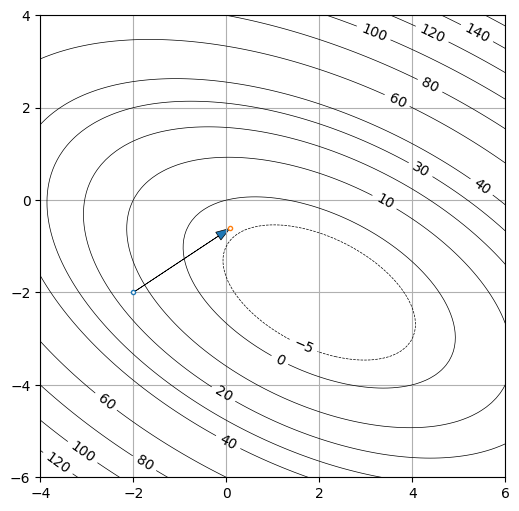

In [5]:
fig2 = plt.figure(2, figsize=[6, 6])
ax_f2 = fig2.add_subplot(1, 1, 1)

CS = ax_f2.contour(x_grid, y_grid, f_vec, linewidths=0.5, colors='black', levels=[-5, 0, 10, 20, 30, 40, 60, 80, 100, 120, 140, 160])
ax_f2.clabel(CS, CS.levels, inline=True, fontsize=10)
# mark point x0
ax_f2.plot(x0[0], x0[1], marker='o', markersize=3, markerfacecolor='w')
# mark point x1
ax_f2.plot(x1[0], x1[1], marker='o', markersize=3, markerfacecolor='w')
# arrow connecting path from point x0 -> x1
ax_f2.arrow( x0[0], x0[1], del_x0[0], del_x0[1], linewidth= 0.5, length_includes_head=True, shape='full', head_width= 0.2 )
ax_f2.grid(True)

---

# Jacobi Iterations

Adapted from chapter 5.2 of:

`An Introduction to the Conjugate Gradient Method Without the Agonizing Pain`, Edition 1 1/4Jonathan Richard Shewchuk, August 4, 1994



The Jacobi method defines a procedure to iteratively solve 

$$
\mathbf{A} \cdot \mathbf{x} = \mathbf{b}
$$

Matrix $\mathbf{A}$ is split into two matrices $\mathbf{D}$ and $\mathbf{E}$. Matrix $\mathbf{D}$ is a diagonal matrix which contains the diagonal elements of matrix $\mathbf{A}$. The off-diagonal elements of $\mathbf{A}$ are then the elements of matrix $\mathbf{E}$.

$$
\mathbf{A}= \mathbf{D} + \mathbf{E}
$$

$$
\mathbf{D} \cdot \mathbf{x}  = - \mathbf{E} \cdot \mathbf{x} + \mathbf{b}
$$

The inverse matrix $\mathbf{D}^{-1}$ is easily obtained since matrix $\mathbf{D}$ is a diagonal matrix.

$$
\mathbf{x}  = - \mathbf{D}^{-1} \cdot \mathbf{E} \cdot \mathbf{x} + \mathbf{D}^{-1} \cdot \mathbf{b}
$$

Defining a new matrix $\mathbf{B}$ and a new vector $\mathbf{z}$ by:

$$\begin{gather}
\mathbf{B} = - \mathbf{D}^{-1} \cdot \mathbf{E}  \\
\mathbf{z} = \mathbf{D}^{-1} \cdot \mathbf{b}
\end{gather}
$$

we get

$$
\mathbf{x}  = \mathbf{B} \cdot \mathbf{x} + \mathbf{z}
$$

Can we use the recurrence

$$
\mathbf{x}_{(i+1)}  = \mathbf{B} \cdot \mathbf{x}_{(i)} + \mathbf{z}
$$

To study how the recurrence evolves for subsequent steps of the iteration each iterate $\mathbf{x}_{(i)}$ is expressed as the sum of the exact solution $\mathbf{x}$ and an error term $\mathbf{e}_{(i)}$

$$
\mathbf{x}_{(i)} = \mathbf{x} + \mathbf{e}_{(i)}
$$

$$\begin{gather}
\mathbf{x}_{(i+1)}  = \mathbf{B} \cdot \left(\mathbf{x} + \mathbf{e}_{(i)} \right) + \mathbf{z} \\
\mathbf{x}_{(i+1)}  = \mathbf{B} \cdot \mathbf{x} + \mathbf{B} \cdot \mathbf{e}_{(i)} + \mathbf{z} \\
\mathbf{x}_{(i+1)}  = \underbrace{\mathbf{B} \cdot \mathbf{x}}_{\mathbf{x}} +  \mathbf{z} + \mathbf{B} \cdot \mathbf{e}_{(i)}  \\
\mathbf{x}_{(i+1)}  = \mathbf{x}  + \mathbf{B} \cdot \mathbf{e}_{(i)}
\end{gather}
$$

If the absolute value of all eigenvalues of matrix $\mathbf{B}$ are $\lt 1$ the term $\mathbf{B} \cdot \mathbf{e}_{(i)}$ gets smaller with every iteration. Finally $\mathbf{x}_{(i+1)} \to \mathbf{x}$.

---


## Convergence of Method of Steepest Descent



We have established the relationship between the residual $\mathbf{r}_{(i)}$ and the error vector $\mathbf{e}_{(i)}$ for the i'the iteration of the method of steepest descent.

$$
\mathbf{r}_{(i)} = \mathbf{b} - \mathbf{b}_{(i)} = \mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(i)} = - \mathbf{A} \cdot \mathbf{e}_{(i)} = -f'(\mathbf{x}_{(i)})
$$

**special case**

Assuming that $\mathbf{e}_{(i)}$ is an eigenvector with eigenvalue $\lambda_e$ the residual is then an eigenvector too:

$$
\mathbf{r}_{(i)} = - \mathbf{A} \cdot \mathbf{e}_{(i)} = - \lambda_e \cdot \mathbf{e}_{(i)}
$$

By left multiplying with matrix $\mathbf{A}$ we get:

$$
\mathbf{A} \cdot \mathbf{r}_{(i)} = - \lambda_e^2 \cdot \mathbf{e}_{(i)} = \lambda_e \cdot \mathbf{r}_{(i)}
$$


The stepsize for this iteration is computed from

$$\begin{gather}
s_{(i)} = \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}}{\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}} \\
s_{(i)} = \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}}{\lambda_e \cdot \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}} \\
s_{(i)} = \frac{1}{\lambda_e}
\end{gather}
$$

Thus computing the resdidual of the next iteration yields:

$$\begin{gather}
\mathbf{r}_{(i+1)} = \mathbf{r}_{(i)} - s_{(i)} \cdot \mathbf{A} \cdot \mathbf{r}_{(i)} \\
\mathbf{r}_{(i+1)} = \mathbf{r}_{(i)} - \frac{1}{\lambda_e} \cdot \lambda_e \cdot \mathbf{r}_{(i)} = 0
\end{gather}
$$

At this point the gradient is $0$ and the *solution point*  $\mathbf{x}_{(i+1)}$ has been found.

---

The special case considered so far is certainly an oversimplification. In general the error vector $\mathbf{e}_{(i)}$ is expressed by a linear combination of eigenvectors. In the case of a symmetric matrix $\mathbf{A}$ it is also known that the $N \times N$ matrix possesses $N$ eigenvectors which are mutually orthogonal.

Let us denote the j'th eigenvector by $\mathbf{v}_j$. Applying that a scaled eigenvector is still an eigenvector with the *same* eigenvalue, we require that each eigenvector shall have unit length.

$$
\mathbf{v}_j^T \cdot \mathbf{v}_k = \begin{cases} 1 & j = k \\
0 & j \neq k
\end{cases}
$$

$$
\mathbf{e}_{(i)} = \sum_{j=1}^{N} u_j \cdot \mathbf{v}_j
$$

With the residual and the error vector related by:

$$
\mathbf{r}_{(i)}  = - \mathbf{A} \cdot \mathbf{e}_{(i)}
$$

we now express the error by the linear combination of eigenvector:


$$
\mathbf{r}_{(i)}  = - \mathbf{A} \cdot \sum_{j=1}^{N} u_j \cdot \mathbf{v}_j = - \sum_{j=1}^{N} u_j \cdot \lambda_j \cdot \mathbf{v}_j 
$$

And here are some other useful properties:

*quadratic norm* of error

$$
||\mathbf{e}_{(i)}|| = \mathbf{e}_{(i)}^T \cdot \mathbf{e}_{(i)} = \sum_{j=1}^{N} u_j^2
$$

$$
\mathbf{e}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(i)} = \left( \sum_{j=1}^{N} u_j \cdot \mathbf{v}_j \right) \cdot \sum_{k=1}^{N} u_k \cdot \lambda_k \cdot \mathbf{v}_k = \sum_{j=1}^{N} u_j^2 \cdot \lambda_j 
$$

*norm of residual*


$$
||\mathbf{r}_{(i)}|| = \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)} = \sum_{j=1}^{N} u_j^2 \cdot \lambda_j^2
$$

$$\begin{gather}
\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)} = \left(\sum_{j=1}^{N} u_j \cdot \lambda_j \cdot \mathbf{v}_j^T \right) \cdot \mathbf{A} \cdot \sum_{k=1}^{N} u_k \cdot \lambda_k \cdot \mathbf{v}_k = \left(\sum_{j=1}^{N} u_j \cdot \lambda_j \cdot \mathbf{v}_j^T \right) \cdot \sum_{k=1}^{N} u_k \cdot \lambda_k^2 \cdot \mathbf{v}_k \\
\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)} = \sum_{j=1}^{N} u_j^2 \cdot \lambda_j^3
\end{gather}
$$

With these expressions we are able to evaluate:

$$\begin{gather}
\mathbf{e}_{(i+1)} = \mathbf{e}_{(i)} +  \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}}{\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}} \cdot \mathbf{r}_{(i)} \\
\mathbf{e}_{(i+1)} = \mathbf{e}_{(i)} +  \frac{\sum_{j=1}^{N} u_j^2 \cdot \lambda_j^2}{\sum_{j=1}^{N} u_j^2 \cdot \lambda_j^3} \cdot \mathbf{r}_{(i)}
\end{gather}
$$

For the unlikely case that all eigenvalues are **identical** we get:

$$\begin{gather}
\mathbf{e}_{(i+1)} = \mathbf{e}_{(i)} +  \frac{1}{\lambda} \cdot \mathbf{r}_{(i)} \\
\mathbf{e}_{(i+1)} = \mathbf{e}_{(i)} -  \frac{1}{\lambda} \cdot \mathbf{A} \cdot \mathbf{e}_{(i)} \\
\mathbf{e}_{(i+1)} = \mathbf{e}_{(i)} -  \frac{1}{\lambda} \cdot \lambda \cdot \mathbf{e}_{(i)} \\
\mathbf{e}_{(i+1)} = 0
\end{gather}
$$

---

## Convergence Properties of Steepest Descent (the general case)

The most general case assumes that there a distinct eigenvalues. Again following the steps described in

`An Introduction to the Conjugate Gradient Method Without the Agonizing Pain`, Edition 1 1/4Jonathan Richard Shewchuk, August 4, 1994

the convergence properties are studied using the *energy norm* defined by:

$$
||\mathbf{e}||_A = \left(\mathbf{e}^T \cdot \mathbf{e}\right)^\frac{1}{2}
$$


From the definition of the quadratic form this equation is obtained:

$$\begin{gather}
||\mathbf{e}_{(i+1)}||_A^2 = \mathbf{e}_{(i+1)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(i+1)} \\
\ = (\mathbf{e}_{(i)}^T + s_{(i)} \mathbf{r}_{(i)}^T) \cdot \mathbf{A} \cdot (\mathbf{e}_{(i)} + s_{(i)} \mathbf{r}_{(i)}) \\
\ = \mathbf{e}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(i)} + 2 \cdot s_{(i)}  \cdot \mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(i)} + s_{(i)}^2 \cdot \mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)} \\
\ = \mathbf{e}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(i)} + 2 \cdot s_{(i)}  \cdot \mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(i)} + s_{(i)}^2 \cdot \mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}
\end{gather}
$$

Inserting the stepsize $s_{(i)}$ into the last equation yields



$$\begin{gather}
||\mathbf{e}_{(i+1)}||_A^2 = ||\mathbf{e}_{(i)}||_A^2  - 2 \cdot \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}}{\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}}  \cdot \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)} + \left( \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}}{\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}}\right)^2 \cdot \mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)} \\
||\mathbf{e}_{(i+1)}||_A^2 = ||\mathbf{e}_{(i)}||_A^2 - \frac{\left(\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)} \right)^2}{\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}} \\
||\mathbf{e}_{(i+1)}||_A^2 = ||\mathbf{e}_{(i)}||_A^2 - \frac{\left(\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)} \right)^2}{\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}} \\
||\mathbf{e}_{(i+1)}||_A^2 = ||\mathbf{e}_{(i)}||_A^2 \cdot \left(1 - \frac{\left(\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)} \right)^2}{\left( \mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)} \right) \cdot \left(\mathbf{e}_{(i+1)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(i+1)} \right)} \right) = ||\mathbf{e}_{(i)}||_A^2 \cdot \omega^2
\end{gather}
$$

The last equation introduced the term $\omega^2$ which is defined below:

$$\begin{gather}
\omega^2 = \left(1 - \frac{\left(\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)} \right)^2}{\left( \mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)} \right) \cdot \left(\mathbf{e}_{(i+1)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(i+1)} \right)} \right) \\
\omega^2 = 1 - \frac{\left( \sum_{j=1}^{N} u_j^2 \cdot \lambda_j^2 \right)^2}{\left( \sum_{j=1}^{N} u_j^2 \cdot \lambda_j^3 \right) \cdot \left( \sum_{j=1}^{N} u_j^2 \cdot \lambda_j \right)}
\end{gather}
$$

Obviously the convergence towards the solution is faster if $\omega^2$ is much smaller than `1`.

We can find an upper bound of $\omega^2$ like  this:

$$\begin{gather}
max(\omega^2 ) = 1 - \frac{ min(\lambda_j)^4 \cdot \left(\sum_{j=1}^{N} u_j^2 \right)^2}{max(\lambda_j)^4 \cdot \left(\sum_{j=1}^{N} u_j^2 \right) \cdot \left( \sum_{j=1}^{N} u_j^2 \right)} \\
max(\omega^2 ) = 1 - \frac{ min(\lambda_j)^4}{max(\lambda_j)^4 }
\end{gather}
$$

Clearly the *spread* of eigenvalues determines the speed of convergence. And for the special case of all eigenvalues being equal we have $\omega^2 = 0$. In that case convergence occurs in a **single** iteration.

----



## Ideas to improve Steepest Descent

Again I will try to close follow the procedure described in article

`An Introduction to the Conjugate Gradient Method Without the Agonizing Pain`, Edition 1 1/4Jonathan Richard Shewchuk, August 4, 1994


Avoid search repeatedly along the same direction (as steepest descent does)

First idea: construct orthogonal search directions 

Search directions are denoted $\mathbf{d}_{(0)},\ \mathbf{d}_{(1)},\ ..., \mathbf{d}_{(m)}$. For each direction find the optimum stepsize $s_{(0)},\ s_{(1)},\ ...,\ s_{(m)}$ for each search step and compute a new vector $\mathbf{x}_{(i)}$. Ensure that for each step the quadratic for is smaller than for the previous step.

If we are at some point $\mathbf{x}_{(i)}$ the next point $\mathbf{x}_{(i+1)}$ is contructed by updating $\mathbf{x}_{(i)}$ along search direction $\mathbf{d}_{(i)}$ with step size $s_{(i)}$:

$$
\mathbf{x}_{(i+1)}= \mathbf{x}_{(i)} + s_{(i)} \cdot \mathbf{d}_{(i)}
$$

----

We evaluate the quadratic form 

$$
f(\mathbf{x}_{(i+1)}) = \frac{1}{2} \cdot \mathbf{x}_{(i+1)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(i+1)} - \mathbf{b}^T \cdot \mathbf{x}_{(i+1)} + c
$$

$$\begin{gather}
f(\mathbf{x}_{(i+1)}) = \frac{1}{2} \cdot \left(\mathbf{x}_{(i)}^T + s_{(i)} \cdot \mathbf{d}_{(i)}^T \right) \cdot \mathbf{A} \cdot \left(\mathbf{x}_{(i)} + s_{(i)} \cdot \mathbf{d}_{(i)} \right) - \mathbf{b} \cdot \left(\mathbf{x}_{(i)} + s_{(i)} \cdot \mathbf{d}_{(i)} \right) + c \\
f(\mathbf{x}_{(i+1)}) = \frac{1}{2} \cdot \left(\mathbf{x}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(i)} + 2 \cdot s_{(i)} \cdot \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(i)} +  s_{(i)}^2 \cdot \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}  \right) - \mathbf{b} \cdot \left(\mathbf{x}_{(i)} + s_{(i)} \cdot \mathbf{d}_{(i)} \right) + c
\end{gather}
$$

Differentiation with respect to step size $s_{(i)}$ and setting the derivative to $0$ yields the optimum stepsize which minimises the quadratic form when going from $\mathbf{x}_{(i)}$ to $\mathbf{x}_{(i+1)}$ in the direction of $\mathbf{d}_{(i)}$:

$$\begin{gather}
\frac{\partial}{\partial s_{(i)}} f(\mathbf{x}_{(i+1)}(s_{(i)}) = \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(i)} +  s_{(i)} \cdot \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)} - \mathbf{d}_{(i)}^T \cdot \mathbf{b} \\
\frac{\partial}{\partial s_{(i)}} f(\mathbf{x}_{(i+1)}(s_{(i)}) = \mathbf{d}_{(i)}^T \cdot \underbrace{\left( \mathbf{A} \cdot \mathbf{x}_{(i)} - \mathbf{b} \right)}_{f'(\mathbf{x}_{(i)}) = -\mathbf{r}_{(i)}} +  s_{(i)} \cdot \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)} \\
\ \\
s_{(i)} = \frac{\mathbf{d}_{(i)}^T \cdot \mathbf{r}_{(i)} }{\mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)} }
\end{gather}
$$

**Note**

This equation for the optimum stepsize corresponds to equation `(32)` of article `An Introduction to the Conjugate Gradient Method Without the Agonizing Pain`.



The gradient at $\mathbf{x}_{(i+1)}$ is computed here:

$$\begin{gather}
f'(\mathbf{x}_{(i+1)}) = \mathbf{A} \cdot \mathbf{x}_{(i+1)} - \mathbf{b} = - \mathbf{r}_{(i+1)}
\end{gather}
$$

Inserting $\mathbf{x}_{(i+1)}$:

$$\begin{gather}
f'(\mathbf{x}_{(i+1)}) = \mathbf{A} \cdot \mathbf{x}_{(i)}  +  s_{(i)} \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}  - \mathbf{b}
\end{gather}
$$

$$\begin{gather}
\mathbf{d}_{(i)}^T \cdot f'(\mathbf{x}_{(i+1)}) = \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(i)}  +  s_{(i)} \cdot \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}  - \mathbf{d}_{(i)}^T \cdot \mathbf{b} \\
\mathbf{d}_{(i)}^T \cdot f'(\mathbf{x}_{(i+1)}) = \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(i)}  +  \mathbf{d}_{(i)}^T \cdot \mathbf{r}_{(i)}    - \mathbf{d}_{(i)}^T \cdot \mathbf{b}
\end{gather}
$$

Using

$$
\mathbf{r}_{(i)} = \mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(i)} 
$$

$$\begin{gather}
\mathbf{d}_{(i)}^T \cdot f'(\mathbf{x}_{(i+1)}) = \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(i)}  +  \mathbf{d}_{(i)}^T \cdot \mathbf{b} - \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{x}_{(i)}  - \mathbf{d}_{(i)}^T \cdot \mathbf{b} \\
\ \\
\mathbf{d}_{(i)}^T \cdot f'(\mathbf{x}_{(i+1)}) = \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \underbrace{\left( \mathbf{x}_{(i+1)} - \mathbf{x}_*  \right)}_{\mathbf{e}_{(i+1)}} = \mathbf{d}_{(i)}^T \cdot \underbrace{\mathbf{A} \cdot \mathbf{e}_{(i+1)}}_{-\mathbf{r}_{(i+1)}} =  - \mathbf{d}_{(i)}^T \cdot \mathbf{r}_{(i+1)} =0
\end{gather}
$$

This shows that at $\mathbf{x}_{(i+1)}$ 

1) the gradient is **orthogonal** to the search direction $\mathbf{d}_{(i)}$ which had been used to get to this point.

2) the residual $\mathbf{r}_{(i+1)}$  (which is the negative gradient) is is **orthogonal** to the search direction $\mathbf{d}_{(i)}$
  
3) the search direction $\mathbf{d}_{(i)}$ is `A-orthogonal` to the error vector $\mathbf{e}_{(i+1)}$


---

The point $\mathbf{x}_{(i+1)}$ can be expressed as a series of updates:

$$
\mathbf{x}_{(i+1)} = \mathbf{x}_{(0)} + \sum_{j=0}^{i}s_{(j)} \cdot \mathbf{d}_{(j)} 
$$

Inserting this expression into the quadratic form yields:

$$
\mathbf{A} \cdot \mathbf{x}_{(i+1)} = \mathbf{A} \cdot \mathbf{x}_{(0)} + \sum_{j=0}^{i}s_{(j)} \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} 
$$

Subtracting vector $\mathbf{b}$ from both sides provides us with:

$$\begin{gather}
\mathbf{A} \cdot \mathbf{x}_{(i+1)} - \mathbf{b} = \mathbf{A} \cdot \mathbf{x}_{(0)} - \mathbf{b} + \sum_{j=0}^{i}s_{(j)} \cdot \mathbf{A} \cdot \mathbf{d}_{(j)}  \\
\mathbf{A} \cdot \mathbf{x}_{(i+1)} - \mathbf{A} \cdot \mathbf{x}_* = \mathbf{A} \cdot \mathbf{x}_{(0)} - \mathbf{A} \cdot \mathbf{x}_* + \sum_{j=0}^{i}s_{(j)} \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} \\
\mathbf{A} \cdot \left(\mathbf{x}_{(i+1)} - \mathbf{x}_* \right) = \mathbf{A} \cdot \left(\mathbf{x}_{(0)} - \mathbf{x}_* \right) + \sum_{j=0}^{i}s_{(j)} \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} \\
\mathbf{A} \cdot \mathbf{e}_{(i+1)} = \mathbf{A} \cdot \mathbf{e}_{(0)} + \sum_{j=0}^{i}s_{(j)} \cdot \mathbf{A} \cdot \mathbf{d}_{(j)}
\end{gather}
$$

The error $\mathbf{e}_{(i+1)}$ is thus found as:

$$\begin{gather}
\mathbf{e}_{(i+1)} = \mathbf{e}_{(0)} + \sum_{j=0}^{i}s_{(j)} \cdot \mathbf{d}_{(j)} \\
\mathbf{e}_{(i+1)} = \underbrace{\mathbf{e}_{(0)} + \sum_{j=0}^{i-1}s_{(j)} \cdot \mathbf{d}_{(j)} }_{\mathbf{e}_{(i)}} + s_{(i)} \cdot \mathbf{d}_{(i)} \\
\mathbf{e}_{(i+1)} = \mathbf{e}_{(i)} + s_{(i)} \cdot \mathbf{d}_{(i)}
\end{gather}
$$

From this equation and the definition of residual $\mathbf{r}_{(i+1)}$ we conclude:

$$\begin{gather}
\mathbf{r}_{(i+1)} = - \mathbf{A} \cdot \mathbf{e}_{(i+1)} \\
\mathbf{r}_{(i+1)} = - \mathbf{A} \cdot \left( \mathbf{e}_{(i)} + s_{(i)} \cdot \mathbf{d}_{(i)}\right) \\
\mathbf{r}_{(i+1)} = \mathbf{r}_{(i)} - s_{(i)} \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}
\end{gather}
$$

----

## A special choice for the search directions: `conjugate` or `A-orthogonal` directions

At this point no special conditions have been imposed on the search directions $ \mathbf{d}_{(i)}$.

In the following sections the following constraint shall apply:

The search directions shall be mutually *A-orthogonal* or *conjugate*. This is equivalent to the condition:

$$
\mathbf{d}_{(j)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(k)} = 0 \ for \ j \neq k
$$

Imposing the contraint that search directions be `A-orthogonal` helps to derive some useful properties. For a $n \times n$ matrix $\mathbf{A}$ there are $n$ A-orthogonal search directions. We can express the error $\mathbf{e}_{(0)}$ as a linear combination of these search directions:

$$
\mathbf{e}_{(0)} = \sum_{j=0}^{n-1} w_{(j)} \cdot \mathbf{d}_{(j)}
$$

Factors $w_{(j)}$ are evaluated from this expression:

$$\begin{gather}
\mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(0)}  = \sum_{j=0}^{n-1} w_{(j)} \cdot \mathbf{d}_{(k)}^T \cdot \mathbf{A}  \mathbf{d}_{(j)}\\
\mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(0)}  = w_{(k)} \cdot \mathbf{d}_{(k)}^T \cdot \mathbf{A}  \mathbf{d}_{(k)}
\end{gather}
$$ 

$w_{(k)}$ is re-written as:

$$\begin{gather}
w_{(k)} = \frac{\mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(0)}}{\mathbf{d}_{(k)}^T \cdot \mathbf{A}  \mathbf{d}_{(k)}} \\
\end{gather}
$$

Exploiting the fact that 

$$\begin{gather}
\mathbf{e}_{(k)} = \mathbf{e}_{(0)} + \sum_{i=0}^{k-1} s_{(i)} \cdot \mathbf{d}_{(i)} \\
\ \\
\mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(k)} = \mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(0)} + \underbrace{\sum_{i=0}^{k-1} s_{(i)} \cdot \mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}}_{0 \ due \ to \ A-orthogonal \ property} \\
\mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(k)} = \mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(0)}
\end{gather}
$$

we get:

$$\begin{gather}
w_{(k)} = \frac{\mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{e}_{(k)}}{\mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(k)}} \\ 
\end{gather}
$$

Comparing this result with the optimum step size of search direction $\mathbf{d}_{(k)}$ we get:

$$
w_{(k)} = -s_{(k)}
$$

For completeness the error $\mathbf{e}_{(k)}$ is examined again:

$$\begin{gather}
\mathbf{e}_{(k)} = \mathbf{e}_{(0)} + \sum_{i=0}^{k-1} s_{(i)} \cdot \mathbf{d}_{(i)} \\
\mathbf{e}_{(k)} = - \sum_{j=0}^{n-1} s_{(j)} \cdot \mathbf{d}_{(j)} + \sum_{i=0}^{k-1} s_{(i)} \cdot \mathbf{d}_{(i)} \\
\mathbf{e}_{(k)} = - \sum_{j=k}^{n-1} s_{(j)} \cdot \mathbf{d}_{(j)} 
\end{gather}
$$


At least in principle (neglecting numerical accuracy) the error term is reduced to $\mathbf{e}_{(n)} = 0$ after applying

1) $n$ `A-orthogonal` search directions $\mathbf{d}_{(i)}$

2) with optimum stepsizes $s_{(i)}$



----
----


## Other properties related to conjugate directions

We have derived the property

$$
\mathbf{d}_{(i)}^T \cdot \mathbf{r}_{(i+1)} =0
$$

Thus the residual $\mathbf{r}_{(i+1)}$ is orthogonal to search direction $\mathbf{d}_{(i)}$. Now we will show that for all other search directions $\mathbf{d}_{(j)};\ j \le i$ the residual $\mathbf{r}_{(i+1)}$ is as well orthogonal to these previous search direction under the condition that search directions be `A-orthogonal`.

The proof uses the update property residuals:

$$
\mathbf{r}_{(i+1)} = \mathbf{r}_{(i)} - s_{(i)} \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}
$$

**case: j=i-1**

$$\begin{gather}
\mathbf{d}_{(i-1)}^T \cdot \mathbf{r}_{(i+1)} = \underbrace{\mathbf{d}_{(i-1)}^T \cdot \mathbf{r}_{(i)}}_{= 0 \to orthogonal \ to \ residual} - s_{(i)} \cdot \underbrace{\mathbf{d}_{(i-1)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}}_{= 0;\ A-orthogonal} \\
\to \\
\mathbf{d}_{(i-1)}^T \cdot \mathbf{r}_{(i+1)} = 0
\end{gather}
$$

**case: j=i-2**

$$\begin{gather}
\mathbf{d}_{(i-2)}^T \cdot \mathbf{r}_{(i+1)} = \mathbf{d}_{(i-2)}^T \cdot \mathbf{r}_{(i)} - s_{(i)} \cdot \underbrace{\mathbf{d}_{(j)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i-2)}}_{= 0;\ A-orthogonal} \\
\mathbf{d}_{(i-2)}^T \cdot \mathbf{r}_{(i+1)} = \mathbf{d}_{(i-2)}^T \cdot \left(\mathbf{r}_{(i-1)} - s_{(i-1)} \cdot \mathbf{A} \cdot \mathbf{d}_{(i-1)}\right) \\
\mathbf{d}_{(i-2)}^T \cdot \mathbf{r}_{(i+1)} = \underbrace{\mathbf{d}_{(i-2)}^T \cdot \mathbf{r}_{(i-1)}}_{= 0 \to orthogonal \ to \ residual} - s_{(i-1)} \cdot \underbrace{\mathbf{d}_{(i-2)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i-1)}}_{= 0;\ A-orthogonal} \\
\to \\
\mathbf{d}_{(i-2)}^T \cdot \mathbf{r}_{(i+1)} = 0
\end{gather}
$$

Repeating this procedure until $j=0$ completes the proof.

---

**Proof residuals are orthogonal**

$\mathbf{r}_{(i+1)}^T \cdot \mathbf{r}_{(i)}$

From the recurrence equation of the residual

$$
\mathbf{r}_{(i+1)} = \mathbf{r}_{(i)} - s_{(i)} \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}
$$

we get:

$$\begin{gather}
\mathbf{r}_{(i+1)}^T \cdot  \mathbf{r}_{(i)} = \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)} - s_{(i)} \cdot \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}
\end{gather}
$$


---

## How to construct A-orthogonal search directions ?

For a quadratic form with $n \times n$ matrix $\mathbf{A}$ there are a total of $n$ linearly independent vectors. These vectors will be denoted $u_0,\ u_1, \dots,\ u_{n-1}$.

Article `An Introduction to the Conjugate Gradient Method Without the Agonizing Pain` describes a procedure how to construct conjugate search directions $d_{(0)},\ d_{(1)},\ \dots,\ d_{(n-1)}$ .


$$
\mathbf{d}_{(i)} = \begin{cases} u_0 & i = 0 \\
u_i + \sum_{k=0}^{i-1} h_{i,\ k} \cdot \mathbf{d}_{(k)}
\end{cases}
$$

To find $\mathbf{d}_{(i)}$ for $i \gt 0$ right-multiply by $\mathbf{A} \cdot \mathbf{d}_{(j)}$ and require $j \lt i$:

$$\begin{gather}
\mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} = u_i^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} + \sum_{k=0}^{i-1} h_{i,\ k} \cdot \mathbf{d}_{(k)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} \\
0 = u_i^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} +  h_{i,\ j} \cdot \mathbf{d}_{(j)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} \\
\ \\
h_{i,\ j}  = - \frac{u_i^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)}}{\mathbf{d}_{(j)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)}}
\end{gather}
$$

The direction vectors can be computed now but there is an obstacle with this approach:

To compute $\mathbf{d}_{(i)}$ all previously computed vectors $\mathbf{d}_{(j)};\ j \lt i$ must be known and stored. For large systems of equations this is hardly a realistic proposition.

What is important here is how to choose vector $\mathbf{u}_i$. We will use:

$$
\mathbf{u}_i = \mathbf{r}_{(i)}
$$

$$
\mathbf{d}_{(i)} = \mathbf{r}_{(i)} + \sum_{k=0}^{i-1} h_{i,\ k} \cdot \mathbf{d}_{(k)} \\
$$


Doing so result in a new expression of $h_{i,\ j}$

$$
h_{i,\ j}  = - \frac{r_i^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)}}{\mathbf{d}_{(j)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)}}
$$

---

**Proof: $\mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}^T = \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}$**

$$\begin{gather}
\mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}^T = \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)} + \sum_{k=0}^{i-1} h_{i,\ k} \cdot \underbrace{\mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot  \mathbf{d}_{(k)}}_{=0: \ A-orthogonal} \\
\mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}^T = \mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{r}_{(i)}
\end{gather}
$$


---

## Some other results


We have shown the error term $\mathbf{e}_{(i)}$ is `A-orthogonal` to all previous search directions $\mathbf{d}_{(j)};\ j \lt i$:

$$\begin{gather}
\mathbf{d}_{(j)} \cdot \mathbf{A} \cdot \mathbf{e}_{(i)} = 0 \\
\ \mathbf{d}_{(j)} \cdot \mathbf{r}_{(i)} = 0
\end{gather}
$$

From equation

$$
\mathbf{d}_{(i)}  = \mathbf{r}_{(i)} + \sum_{k=0}^{i-1} h_{i,\ k} \cdot \mathbf{d}_{(k)}
$$

we obtain by multiplying with residual $\mathbf{r}_{(j)};\ i \lt j$:

$$
\underbrace{\mathbf{d}_{(i)}^T  \cdot \mathbf{r}_{(j)}}_{=0}  = \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(j)} + \sum_{k=0}^{i-1} h_{i,\ k} \cdot \underbrace{\mathbf{d}_{(k)}^T \cdot \mathbf{r}_{(j)}}_{=0}
$$

Hence :

$$
\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(j)} = 0  \ ; \ for \ i \lt j
$$

The residual is thus orthogonal to all previously generated residuals.

And there is another useful identity which will be needed:

$$\begin{gather}
\mathbf{d}_{(i)}^T  \cdot \mathbf{r}_{(i)}  = \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)} + \sum_{k=0}^{i-1} h_{i,\ k} \cdot \underbrace{\mathbf{d}_{(k)}^T \cdot \mathbf{r}_{(i)}}_{=0} \\
\ \to \\
\mathbf{d}_{(i)}^T  \cdot \mathbf{r}_{(i)}  = \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)} 
\end{gather}
$$

Multiplying the residual $\mathbf{r}_{(j+1)}$ by the previous residual $\mathbf{r}_{(i)}$ and re-arranging the equation yields:

$$\begin{gather}
\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(j+1)} = \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(j)} - s_{(j)} \cdot \mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} \\
 s_{(j)} \cdot \mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} = \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(j)} - \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(j+1)} 
\end{gather}
$$

Using the orthogonality of residual $\mathbf{r}_{(i)}$ to all other previous residual $\mathbf{r}_{(j)};\ j \lt i$ the expression for $\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)}$ is evaluated:

$$
\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} = \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(j)} - \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(j+1)} }{s_{(j)}}
$$

Only the cases $i = j$ and $i = j+1$ need be considered:

$$\begin{gather}
\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)} = \begin{cases}
\frac{1}{s_{(i)}} \cdot \mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)} & \ for \ i = j \\
-\frac{1}{s_{(i-1)}} \cdot \mathbf{r}_{(j+1)}^T \cdot \mathbf{r}_{(j+1)}  & \ for \ i = j + 1 \\
0 & otherwise
\end{cases}
\end{gather}
$$


Again *without* proof in the expression

$$
\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(j)}
$$

the residual $\mathbf{r}_{(i)}$ is `A-orthogonal` to vector $\mathbf{d}_{(j)}$ for $j \lt i-1$. Then only $h_{i,\ i-1}$ is different from $0$:


$$
h_{i,\ i-1}  = - \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i-1)}}{\mathbf{d}_{(i-1)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i-1)}} = \frac{1}{s_{(i-1)}} \cdot \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}}{\mathbf{d}_{(i-1)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i-1)}} 
$$

Since factor $h_{i,\ i-1}$ only depends on index $i$ we drop the superfluous double index:

$$
h_{i} = h_{i,\ i-1} = \frac{1}{s_{(i-1)}} \cdot \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}}{\mathbf{d}_{(i-1)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i-1)}} 
$$

Inserting stepsize $s_{(i-1)}$

$$
s_{(i-1)} = \frac{\mathbf{d}_{(i-1)}^T \cdot \mathbf{r}_{(i-1)} }{\mathbf{d}_{(i-1)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i-1)} }
$$

$$
h_{i} = \frac{\mathbf{r}_{(i)}^T \cdot \mathbf{r}_{(i)}}{\mathbf{d}_{(i-1)}^T \cdot \mathbf{r}_{(i-1)}} 
$$

The update equation for a new search direction is then expressed as:

$$
\mathbf{d}_{(i)} = \mathbf{r}_{(i)} + h_{i} \cdot \mathbf{d}_{(i-1)} \\
$$

---



## The Algorithm



**Initialisation**

Choice of starting vector $\mathbf{x}_{(0)}$:

Example:  $\mathbf{x}_{(0)} = 0$

Residual 

$$
\mathbf{r}_{(0)} = \mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(0)}
$$

Search direction (initially the direction of steepest descent):

$$
\mathbf{d}_{(0)} = \mathbf{r}_{(0)}
$$


**Iterations**

For $i := 0,\ 1,\ 2, \cdots,\ N$

The optimum step size for the current search direction:

$$
s_{(i)} = \frac{\mathbf{d}_{(i)}^T \cdot \mathbf{r}_{(i)} }{\mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)} }
$$

Update of x-vector:

$$
\mathbf{x}_{(i+1)}= \mathbf{x}_{(i)} + s_{(i)} \cdot \mathbf{d}_{(i)}
$$

Update of residual:

$$
\mathbf{r}_{(i+1)} = \mathbf{r}_{(i)} - s_{(i)} \cdot \mathbf{A} \cdot \mathbf{d}_{(i)}
$$


$$
h_{i+1} = \frac{\mathbf{r}_{(i+1)}^T \cdot \mathbf{r}_{(i+1)}}{\mathbf{d}_{(i)}^T \cdot \mathbf{r}_{(i)}} 
$$

A new search direction:

$$
\mathbf{d}_{(i+1)} = \mathbf{r}_{(i+1)} + h_{i+1} \cdot \mathbf{d}_{(i)} \\
$$


**Termination**

A suitable termination criterion may use the quadratic norm of the residual  $\mathbf{r}_{(i+1)} $
and compare it to an acceptance threshold. The iteration is terminated once the criterion is below that threshold.

# Example



In [6]:
# 2 x 2 matrix
A_mat = np.array([[3.0, 2.0], [2.0, 6.0]])
# row column vector)
b_vec = np.array([2.0, -8])

Nx = 100
Ny = 100
x_min = -4.0
x_max = 6.0
y_min = -6
y_max = 4
x_vec = np.linspace(x_min, x_max, Nx)
y_vec = np.linspace(y_min, y_max, Ny)
# making a grid (required for contour plots)
x_grid, y_grid = np.meshgrid(x_vec, y_vec, indexing='xy')

# initialise memory for function values
f_vec = np.zeros(x_grid.shape)

# loop over rows and compute the value of the quadratic form 
# note: this may not be the most elegant approach to calculate the quadratic form efficiently ... 
for i_row in range(Ny):
    xv = np.array([x_grid[i_row, :], y_grid[i_row, :]])
    bx = np.dot(b_vec, xv)
    ax = np.dot(A_mat, xv)
    tmp = xv * ax
    f_vec[i_row, :] = 0.5 * tmp.sum(axis=0) - bx + c_scalar

#
#--- the conjugate gradient method
#

# Initialisation
# starting point x0 (as column vector)
x0 = np.array( [-2, -2] ).T
# the residual (negative gradient vector)
r0 = b_vec.T - np.dot(A_mat, x0)
# the search direction 
d0 = r0

# tolerance ; if residual is less than this value stop iteration
# this is to prevent division by zero when computing the stepsize
tolerance = 1e-4

# put x0, r0, r0 into lists
residual_lst = [r0]
direction_lst = [d0]
xvec_lst = [x0]

#----- iterations ------
for k in range(2):
    Ad_vec = np.dot(A_mat, direction_lst[-1])
    # the denominator for the stepsize 
    s_denom = np.dot(direction_lst[-1].T, Ad_vec)
    # the nominator for the stepsize
    s_nom = np.dot(direction_lst[-1].T, residual_lst[-1])
    # the stepsize
    step_size = s_nom/s_denom
    # new x vector
    xn = xvec_lst[-1] + step_size * direction_lst[-1]
    # new residual
    rn = residual_lst[-1] - step_size * Ad_vec

    hn = np.dot(rn.T, rn) / np.dot(residual_lst[-1].T, residual_lst[-1])
    # new search direction
    dn = rn + hn * direction_lst[-1]
    # updating lists
    residual_lst.append(rn)
    direction_lst.append(dn)
    xvec_lst.append(xn)

    # evaluate stopping criterion
    if np.inner(rn, rn) <= tolerance :
        break

# for plotting the trajectory of iteration points, collect x, y coordinates in separate list
xv = []
yv = []
for item in xvec_lst:
    xv.append(item[0])
    yv.append(item[1])

# note that residual is quite small --> solution has been found in 2 iterations
print(f"residual : {rn}")
print(f"norm2    : {np.inner(rn, rn):8.3e}")
print(f"xvec     : {xn}")

residual : [-4.4408921e-16 -8.8817842e-16]
norm2    : 9.861e-31
xvec     : [ 2. -2.]


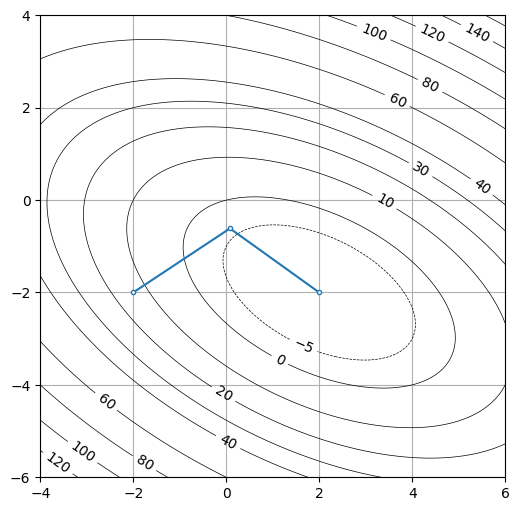

In [7]:
fig3 = plt.figure(3, figsize=[6, 6])
ax_f3 = fig3.add_subplot(1, 1, 1)

CS = ax_f3.contour(x_grid, y_grid, f_vec, linewidths=0.5, colors='black', levels=[-5, 0, 10, 20, 30, 40, 60, 80, 100, 120, 140, 160])
ax_f3.clabel(CS, CS.levels, inline=True, fontsize=10)
ax_f3.plot(xv, yv, marker='o', linestyle='-', markersize=3, markerfacecolor='w')
ax_f3.grid(True)

---

# Solving Least Squares Problems

Let $\mathbf{U}$ denote a $m \times n$ matrix. The equation 

$$
\mathbf{U} \cdot \mathbf{x} = \mathbf{v}
$$

shall be solved. In general the solution is not unique. But the problem can be stated as a least squares problem where the solution vector $\mathbf{x}$ can be found by minimizing the quadratic norm.

At this point the following assumption shall be made.

1) matrix $\mathbf{U}$ is real valued

2) vectors $\mathbf{x}$ and $\mathbf{v}$ are real valued

Thus the goal is to minimize a scalar function $g(\mathbf{x})$ defined by this equation:

$$\begin{gather}
g(\mathbf{x})  = \left(\mathbf{U} \cdot \mathbf{x} - \mathbf{v} \right)^T \cdot \left(\mathbf{U} \cdot \mathbf{x} - \mathbf{v} \right) \\
g(\mathbf{x})  = \left(\mathbf{x}^T \cdot \mathbf{U}^T - \mathbf{v}^T \right) \cdot \left(\mathbf{U} \cdot \mathbf{x} -\mathbf{v} \right) \\
g(\mathbf{x}) = \mathbf{x}^T \cdot \mathbf{U}^T \cdot \mathbf{U} \cdot \mathbf{x} - 2 \cdot\mathbf{v}^T \cdot \mathbf{U} \cdot \mathbf{x} +  \mathbf{v}^T \cdot \mathbf{v}
\end{gather}
$$

Defining a new function $f(\mathbf{x}) = \frac{1}{2} \cdot g(\mathbf{x})$ gives us the standard notation of quadratic forms:

$$
f(\mathbf{x}) = \frac{1}{2} \cdot \mathbf{x}^T \cdot \underbrace{\mathbf{U}^T \cdot \mathbf{U}}_{\mathbf{A}} \cdot \mathbf{x} - \underbrace{\mathbf{v}^T \cdot \mathbf{U}}_{\mathbf{b}^T} \cdot \mathbf{x} +  \underbrace{\frac{1}{2} \cdot \mathbf{v}^T \cdot \mathbf{v}}_{c}
$$

Regardless of the shape of matrix $\mathbf{U}$ the matrix $\mathbf{A}$ is square, symmetric and positive definite.

To minimize the quadratic form of the least squares problem the conjugate gradient method can be used.

**literature**

In her highly readable bachelor thesis

`Conjugate Gradients and Conjugate Residuals type methods for solving Least Squares problems from Tomography` (Delft University of Technology)

Tamara Kloek discusses various aspects of solving the normal equation iteratively using the conjugate gradient method (among others).

----




## The Conjugate Gradient Method applied to the Least Squares problem



**Initialisation**

Choice of starting vector $\mathbf{x}_{(0)}$:

Example:  $\mathbf{x}_{(0)} = 0$

Residual 

$$\begin{gather}
\mathbf{r}_{(0)} = \mathbf{b} - \mathbf{A} \cdot \mathbf{x}_{(0)} \\
\mathbf{r}_{(0)} = \mathbf{U}^T \cdot \mathbf{v} - \mathbf{U}^T \cdot \mathbf{U} \cdot \mathbf{x}_{(0)} \\
\mathbf{r}_{(0)} = \mathbf{U}^T \cdot \left(\mathbf{v}  - \mathbf{U} \cdot \mathbf{x}_{(0)} \right)
\end{gather}
$$

Defining another residual $\mathbf{r}_{v,(0)} = \mathbf{v}  - \mathbf{U} \cdot \mathbf{x}_{(0)}$ :

$$
\mathbf{r}_{v,(0)} = \mathbf{v}  - \mathbf{U} \cdot \mathbf{x}_{(0)}
$$

$$
\mathbf{r}_{(0)} = \mathbf{U}^T \cdot \mathbf{r}_{v,(0)}
$$

Search direction (initially the direction of steepest descent):

$$
\mathbf{d}_{(0)} = \mathbf{r}_{(0)}
$$


**Iterations**

For $i := 0,\ 1,\ 2, \cdots,\ N$

The optimum step size for the current search direction:

$$
s_{(i)} = \frac{\mathbf{d}_{(i)}^T \cdot \mathbf{r}_{(i)} }{\mathbf{d}_{(i)}^T \cdot \mathbf{A} \cdot \mathbf{d}_{(i)} }
$$

From the relationship of $\mathbf{A}$ and $\mathbf{U}$ the stepsize is expressed by equation:

$$\begin{gather}
s_{(i)} = \frac{\mathbf{d}_{(i)}^T \cdot \mathbf{r}_{(i)} }{\mathbf{d}_{(i)}^T \cdot \mathbf{U}^T \cdot \mathbf{U} \cdot \mathbf{d}_{(i)} } \\
s_{(i)} = \frac{\mathbf{d}_{(i)}^T \cdot \mathbf{r}_{(i)} }{\left(\mathbf{U} \cdot \mathbf{d}_{(i)} \right)^T \cdot \left(\mathbf{U} \cdot \mathbf{d}_{(i)} \right)} \\
\end{gather}
$$


Update of x-vector:

$$
\mathbf{x}_{(i+1)}= \mathbf{x}_{(i)} + s_{(i)} \cdot \mathbf{d}_{(i)}
$$

Update of residual:

$$
\mathbf{r}_{(i+1)} = \mathbf{r}_{(i)} - s_{(i)} \cdot \mathbf{U}^T \cdot \left( \mathbf{U} \cdot \mathbf{d}_{(i)} \right)
$$


$$
h_{i+1} = \frac{\mathbf{r}_{(i+1)}^T \cdot \mathbf{r}_{(i+1)}}{\mathbf{d}_{(i)}^T \cdot \mathbf{r}_{(i)}} 
$$

A new search direction:

$$
\mathbf{d}_{(i+1)} = \mathbf{r}_{(i+1)} + h_{i+1} \cdot \mathbf{d}_{(i)} \\
$$

Apart from the initialisation there are 2 matrix multiplications which must be computed in every iteration:

$$\begin{gather}
\mathbf{U} \cdot \mathbf{d}_{(i)} \\
\mathbf{U}^T \cdot \left( \mathbf{U} \cdot \mathbf{d}_{(i)} \right)
\end{gather}
$$

It is never required to compute $\mathbf{A} = \mathbf{U}^T \cdot \mathbf{U}$ directly. This is especially important if matrix $\mathbf{U}$ is sparse.


**Termination**

A suitable termination criterion may use the quadratic norm of the residual  $\mathbf{r}_{(i+1)} $
and compare it to an acceptance threshold. The iteration is terminated once the criterion is below that threshold.

Using a criterion to stop the iteration is necessary to avoid a *division by zero* when computing the stepsize $s_{(i)}$. 

---

## Example 

Using the 2D example of the previous section we compute the solution of the normal equation. Again the result should be identical to previous results (if we neglect the effects of numerical accuracy)

In [8]:
# 2 x 2 matrix
U_mat = np.array([[3.0, 2.0], [2.0, 6.0]])
# row column vector)
v_vec = np.array([2.0, -8])

# Initialisation
# starting point x0 (as column vector)
x0 = np.array( [-2, -2] ).T
# the residual (negative gradient vector)
rv0 = v_vec.T - np.dot(U_mat, x0)
r0 = np.dot(U_mat.T, rv0)
# the search direction 
d0 = r0

# tolerance ; if residual is less than this value stop iteration
# this is to prevent division by zero when computing the stepsize
tolerance = 1e-4

# put x0, r0, r0 into lists
residual_lst = [r0]
direction_lst = [d0]
xvec_lst = [x0]

#----- iterations ------
# set the number of iterations (for this examples only 2 steps should be necessary)
Ni = 20
for k in range(Ni):
    Ud_vec = np.dot(U_mat, direction_lst[-1])
    # the denominator for the stepsize 
    s_denom = np.dot(Ud_vec.T, Ud_vec)
    # the nominator for the stepsize
    s_nom = np.dot(direction_lst[-1].T, residual_lst[-1])
    # the stepsize
    step_size = s_nom/s_denom
    # new x vector
    xn = xvec_lst[-1] + step_size * direction_lst[-1]
    # new residual
    rn = residual_lst[-1] - step_size * np.dot(U_mat.T, Ud_vec)

    hn = np.dot(rn.T, rn) / np.dot(residual_lst[-1].T, residual_lst[-1])
    # new search direction
    dn = rn + hn * direction_lst[-1]
    # updating lists
    residual_lst.append(rn)
    direction_lst.append(dn)
    xvec_lst.append(xn)

    # evaluate stopping criterion
    if np.inner(rn, rn) <= tolerance :
        break

# note that residual is quite small --> solution has been found in 2 iterations
print(f"number iterations: {k}")
print(f"residual : {rn}")
print(f"norm2    : {np.inner(rn, rn):8.3e}")
print(f"xvec     : {xn}")

number iterations: 1
residual : [-3.55271368e-15 -7.99360578e-15]
norm2    : 7.652e-29
xvec     : [ 2. -2.]
